In [1]:
from stats_can import StatsCan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#seaborn theme
import seaborn as sns
sns.set(font='Gill Sans MT')

In [2]:
sc = StatsCan()

In [3]:
df = sc.table_to_df('14-10-0294-02')
sc.update_tables()


['14100097', '14100294']

In [4]:
df = sc.table_to_df('14-10-0294-02')


In [5]:
df

,REF_DATE,GEO,DGUID,Labour force characteristics,Statistics,Data type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2001-03-01,Canada,2016A000011124,Population,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91445764,1.1.1.1,24281.3,NaN,NaN,NaN,1
1,2001-03-01,Canada,2016A000011124,Population,Estimate,Unadjusted,Persons,249,thousands,3,v91445765,1.1.1.2,24281.3,NaN,NaN,NaN,1
2,2001-03-01,Canada,2016A000011124,Labour force,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91445766,1.2.1.1,16010.7,NaN,NaN,NaN,1
3,2001-03-01,Canada,2016A000011124,Labour force,Estimate,Unadjusted,Persons,249,thousands,3,v91445767,1.2.1.2,15758.5,NaN,NaN,NaN,1
4,2001-03-01,Canada,2016A000011124,Labour force,Standard error of estimate,Seasonally adjusted,Persons,249,thousands,3,v101896490,1.2.2.1,33.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338555,2020-04-01,"Victoria, British Columbia",2011S0503935,Employment rate,Estimate,Seasonally adjusted,Percentage,242,units,0,v91446406,46.7.1.1,57.7,NaN,NaN,NaN,1
338556,2020-04-01,"Victoria, British Columbia",2011S0503935,Employment rate,Estimate,Unadjusted,Percentage,242,units,0,v91446407,46.7.1.2,56.7,NaN,NaN,NaN,1
338557,2020-04-01,"Victoria, British Columbia",2011S0503935,Employment rate,Standard error of estimate,Seasonally adjusted,Percentage,242,units,0,v101897315,46.7.2.1,1.7,NaN,NaN,NaN,1
338558,2020-04-01,"Victoria, British Columbia",2011S0503935,Employment rate,Standard error of month-to-month change,Seasonally adjusted,Percentage,242,units,0,v101897316,46.7.3.1,0.5,NaN,NaN,NaN,1


In [6]:
calgary = df[df['GEO']=="Calgary, Alberta"]

In [7]:
calgary

,REF_DATE,GEO,DGUID,Labour force characteristics,Statistics,Data type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
1248,2001-03-01,"Calgary, Alberta",2011S0503825,Population,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91446310,40.1.1.1,769.0,NaN,NaN,NaN,1
1249,2001-03-01,"Calgary, Alberta",2011S0503825,Population,Estimate,Unadjusted,Persons,249,thousands,3,v91446311,40.1.1.2,769.0,NaN,NaN,NaN,1
1250,2001-03-01,"Calgary, Alberta",2011S0503825,Labour force,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91446312,40.2.1.1,575.1,NaN,NaN,NaN,1
1251,2001-03-01,"Calgary, Alberta",2011S0503825,Labour force,Estimate,Unadjusted,Persons,249,thousands,3,v91446313,40.2.1.2,567.5,NaN,NaN,NaN,1
1252,2001-03-01,"Calgary, Alberta",2011S0503825,Labour force,Standard error of estimate,Seasonally adjusted,Persons,249,thousands,3,v101897192,40.2.2.1,8.3,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338363,2020-04-01,"Calgary, Alberta",2011S0503825,Employment rate,Estimate,Seasonally adjusted,Percentage,242,units,0,v91446322,40.7.1.1,61.2,NaN,NaN,NaN,1
338364,2020-04-01,"Calgary, Alberta",2011S0503825,Employment rate,Estimate,Unadjusted,Percentage,242,units,0,v91446323,40.7.1.2,60.7,NaN,NaN,NaN,1
338365,2020-04-01,"Calgary, Alberta",2011S0503825,Employment rate,Standard error of estimate,Seasonally adjusted,Percentage,242,units,0,v101897207,40.7.2.1,1.0,NaN,NaN,NaN,1
338366,2020-04-01,"Calgary, Alberta",2011S0503825,Employment rate,Standard error of month-to-month change,Seasonally adjusted,Percentage,242,units,0,v101897208,40.7.3.1,0.3,NaN,NaN,NaN,1


In [8]:
calgary['Statistics'].unique()

[Estimate, Standard error of estimate, Standard error of month-to-month change, Standard error of year-over-year change]
Categories (4, object): [Estimate, Standard error of estimate, Standard error of month-to-month change, Standard error of year-over-year change]

In [9]:
cal_est = calgary[calgary['Statistics']=='Estimate']

In [10]:
cal_est

,REF_DATE,GEO,DGUID,Labour force characteristics,Statistics,Data type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
1248,2001-03-01,"Calgary, Alberta",2011S0503825,Population,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91446310,40.1.1.1,769.0,NaN,NaN,NaN,1
1249,2001-03-01,"Calgary, Alberta",2011S0503825,Population,Estimate,Unadjusted,Persons,249,thousands,3,v91446311,40.1.1.2,769.0,NaN,NaN,NaN,1
1250,2001-03-01,"Calgary, Alberta",2011S0503825,Labour force,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91446312,40.2.1.1,575.1,NaN,NaN,NaN,1
1251,2001-03-01,"Calgary, Alberta",2011S0503825,Labour force,Estimate,Unadjusted,Persons,249,thousands,3,v91446313,40.2.1.2,567.5,NaN,NaN,NaN,1
1255,2001-03-01,"Calgary, Alberta",2011S0503825,Employment,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91446314,40.3.1.1,546.7,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338354,2020-04-01,"Calgary, Alberta",2011S0503825,Unemployment rate,Estimate,Unadjusted,Percentage,242,units,0,v91446319,40.5.1.2,10.9,NaN,NaN,NaN,1
338358,2020-04-01,"Calgary, Alberta",2011S0503825,Participation rate,Estimate,Seasonally adjusted,Percentage,242,units,0,v91446320,40.6.1.1,68.6,NaN,NaN,NaN,1
338359,2020-04-01,"Calgary, Alberta",2011S0503825,Participation rate,Estimate,Unadjusted,Percentage,242,units,0,v91446321,40.6.1.2,68.1,NaN,NaN,NaN,1
338363,2020-04-01,"Calgary, Alberta",2011S0503825,Employment rate,Estimate,Seasonally adjusted,Percentage,242,units,0,v91446322,40.7.1.1,61.2,NaN,NaN,NaN,1


In [11]:
#filter out non relevant information
cal_est = cal_est.filter(items = ['REF_DATE','Labour force characteristics','Data type','UOM', 'VALUE'])

In [12]:
cal_est

,REF_DATE,Labour force characteristics,Data type,UOM,VALUE
1248,2001-03-01,Population,Seasonally adjusted,Persons,769.0
1249,2001-03-01,Population,Unadjusted,Persons,769.0
1250,2001-03-01,Labour force,Seasonally adjusted,Persons,575.1
1251,2001-03-01,Labour force,Unadjusted,Persons,567.5
1255,2001-03-01,Employment,Seasonally adjusted,Persons,546.7
...,...,...,...,...,...
338354,2020-04-01,Unemployment rate,Unadjusted,Percentage,10.9
338358,2020-04-01,Participation rate,Seasonally adjusted,Percentage,68.6
338359,2020-04-01,Participation rate,Unadjusted,Percentage,68.1
338363,2020-04-01,Employment rate,Seasonally adjusted,Percentage,61.2


In [13]:
cal_unadj = cal_est[(cal_est['UOM']=='Persons') & (cal_est['Data type']=='Unadjusted')]

In [14]:
cal_pivot = cal_unadj.pivot(index='REF_DATE', columns = 'Labour force characteristics',values ='VALUE')
cal_pivot

Labour force characteristics,Population,Labour force,Employment,Unemployment
REF_DATE,,,,
2001-03-01,769.0,567.5,540.0,27.5
2001-04-01,771.1,570.8,544.3,26.5
2001-05-01,773.2,577.3,552.4,24.9
2001-06-01,775.4,588.7,565.0,23.7
2001-07-01,777.6,599.3,572.8,26.5
...,...,...,...,...
2019-12-01,1286.0,929.6,864.7,64.9
2020-01-01,1288.2,921.0,855.9,65.1
2020-02-01,1290.4,912.6,845.3,67.3


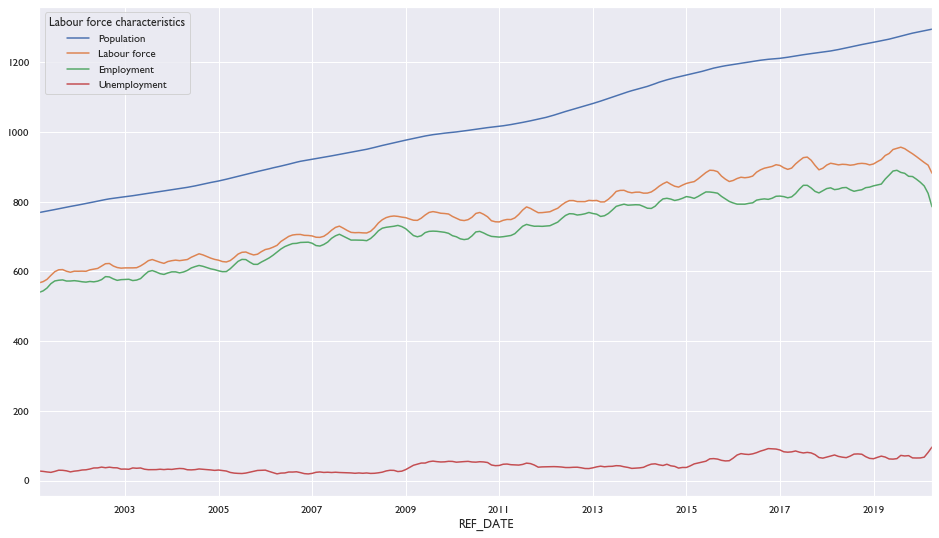

In [15]:
cal_pivot[['Population','Labour force', 'Employment','Unemployment']].plot(figsize = (16,9),kind='line')

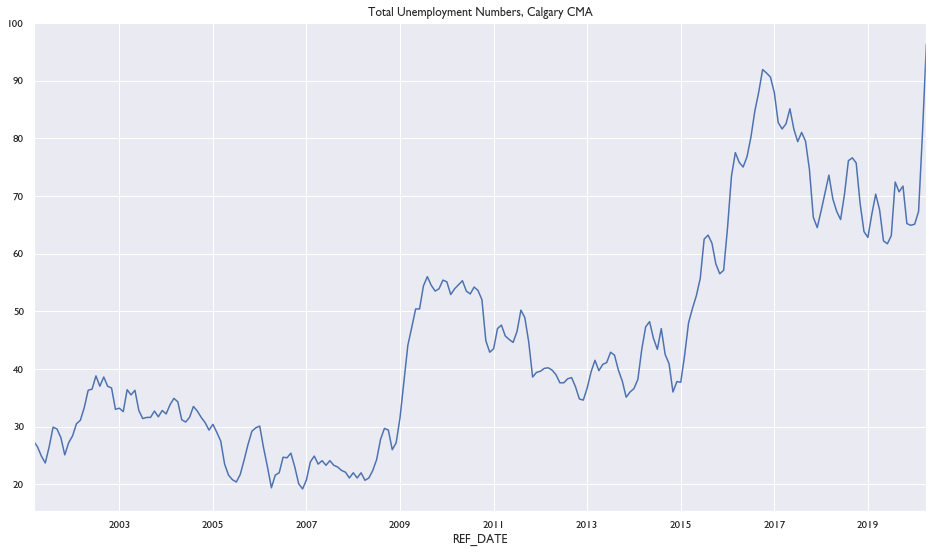

In [16]:
cal_pivot['Unemployment'].plot(figsize = (16,9),kind='line', title = 'Total Unemployment Numbers, Calgary CMA')

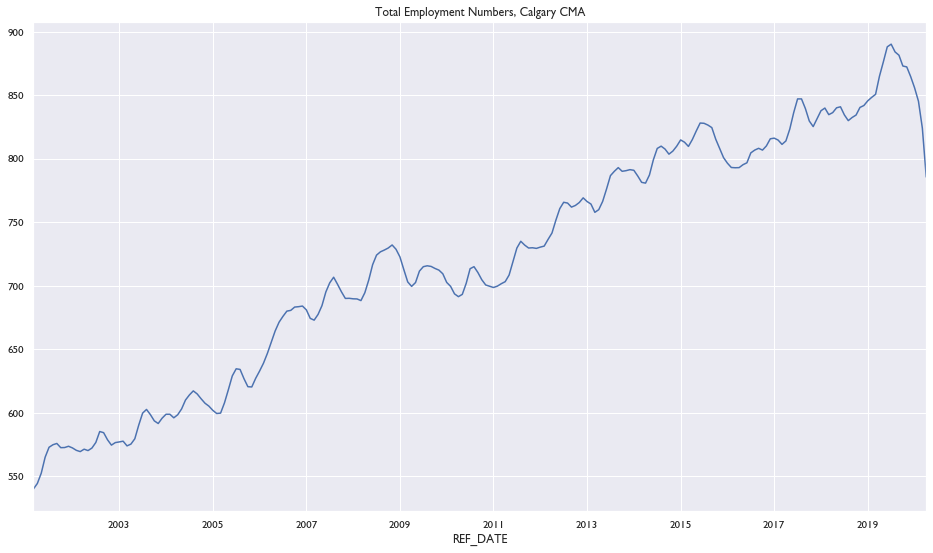

In [17]:
cal_pivot['Employment'].plot(figsize = (16,9),kind='line', title = 'Total Employment Numbers, Calgary CMA')

In [18]:
cal_rates = cal_est[(cal_est['UOM']=='Percentage') & (cal_est['Data type']=='Unadjusted')]

In [19]:
cal_rate_pivot= cal_rates.pivot(index='REF_DATE', columns = 'Labour force characteristics',values ='VALUE')

In [20]:
cal_rate_pivot

Labour force characteristics,Unemployment rate,Participation rate,Employment rate
REF_DATE,,,
2001-03-01,4.8,73.8,70.2
2001-04-01,4.6,74.0,70.6
2001-05-01,4.3,74.7,71.4
2001-06-01,4.0,75.9,72.9
2001-07-01,4.4,77.1,73.7
...,...,...,...
2019-12-01,7.0,72.3,67.2
2020-01-01,7.1,71.5,66.4
2020-02-01,7.4,70.7,65.5


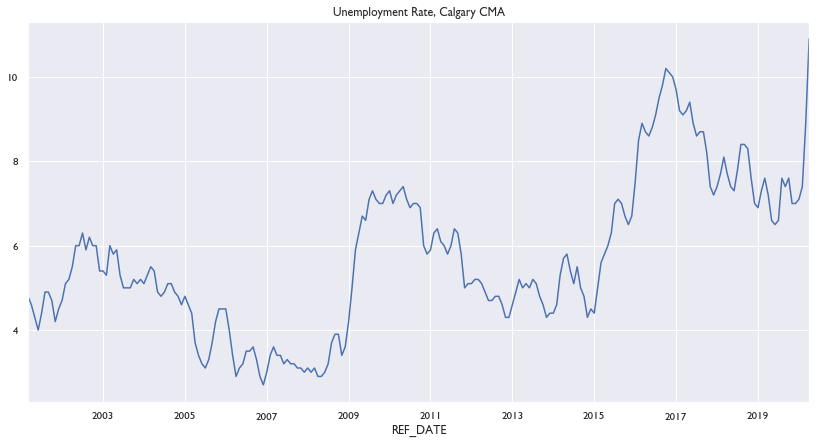

In [21]:
cal_rate_pivot['Unemployment rate'].plot(figsize=(14,7), title='Unemployment Rate, Calgary CMA')

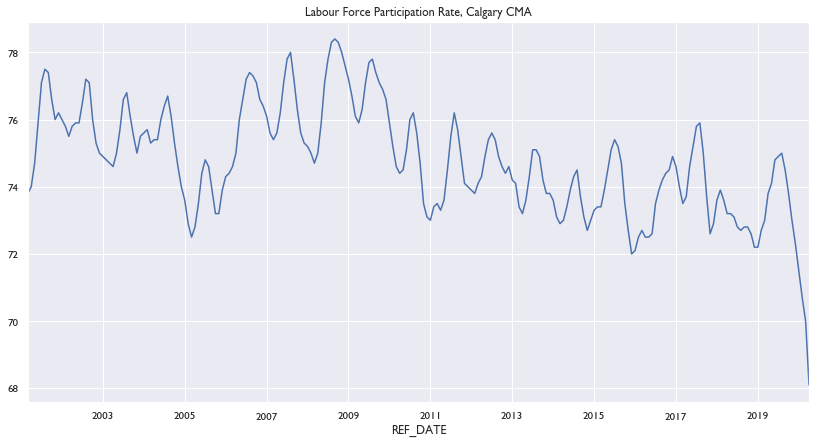

In [22]:
cal_rate_pivot['Participation rate'].plot(figsize=(14,7), title='Labour Force Participation Rate, Calgary CMA')

In [23]:
wage_ind = sc.table_to_df('14-10-0063-01')

In [24]:
wage_ind

,REF_DATE,GEO,DGUID,Wages,Type of work,North American Industry Classification System (NAICS),Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1997-01-01,Canada,2016A000011124,"Total employees, all wages",Both full- and part-time employees,"Total employees, all industries",Both sexes,15 years and over,Persons,249,thousands,3,v2132578,1.1.1.1.1.1,10921.0,NaN,NaN,NaN,1
1,1997-01-01,Canada,2016A000011124,"Total employees, all wages",Both full- and part-time employees,"Total employees, all industries",Both sexes,15 to 24 years,Persons,249,thousands,3,v2132863,1.1.1.1.1.2,1721.8,NaN,NaN,NaN,1
2,1997-01-01,Canada,2016A000011124,"Total employees, all wages",Both full- and part-time employees,"Total employees, all industries",Both sexes,25 to 54 years,Persons,249,thousands,3,v2133148,1.1.1.1.1.3,8333.1,NaN,NaN,NaN,1
3,1997-01-01,Canada,2016A000011124,"Total employees, all wages",Both full- and part-time employees,"Total employees, all industries",Both sexes,55 years and over,Persons,249,thousands,3,v2133433,1.1.1.1.1.4,866.2,NaN,NaN,NaN,1
4,1997-01-01,Canada,2016A000011124,"Total employees, all wages",Both full- and part-time employees,"Total employees, all industries",Males,15 years and over,Persons,249,thousands,3,v2133718,1.1.1.1.2.1,5645.4,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10533595,2020-04-01,British Columbia,2016A000259,Median weekly wage rate,Part-time employees,Public administration [91],Males,55 years and over,Current dollars,75,units,0,v2169057,11.5.3.19.2.4,NaN,x,NaN,NaN,2
10533596,2020-04-01,British Columbia,2016A000259,Median weekly wage rate,Part-time employees,Public administration [91],Females,15 years and over,Current dollars,75,units,0,v2169342,11.5.3.19.3.1,825.0,NaN,NaN,NaN,2
10533597,2020-04-01,British Columbia,2016A000259,Median weekly wage rate,Part-time employees,Public administration [91],Females,15 to 24 years,Current dollars,75,units,0,v2169627,11.5.3.19.3.2,NaN,x,NaN,NaN,2
10533598,2020-04-01,British Columbia,2016A000259,Median weekly wage rate,Part-time employees,Public administration [91],Females,25 to 54 years,Current dollars,75,units,0,v2169912,11.5.3.19.3.3,546.0,NaN,NaN,NaN,2


In [33]:
wage_ind_ab = wage_ind[wage_ind['GEO']=='Alberta']

In [35]:

wage_ind_ab.index = wage_ind_ab['REF_DATE']
wage_ind_ab

,REF_DATE,GEO,DGUID,Wages,Type of work,North American Industry Classification System (NAICS),Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
REF_DATE,,,,,,,,,,,,,,,,,,,
1997-01-01,1997-01-01,Alberta,2016A000248,"Total employees, all wages",Both full- and part-time employees,"Total employees, all industries",Both sexes,15 years and over,Persons,249,thousands,3,v2163358,10.1.1.1.1.1,1107.30,NaN,NaN,NaN,1
1997-01-01,1997-01-01,Alberta,2016A000248,"Total employees, all wages",Both full- and part-time employees,"Total employees, all industries",Both sexes,15 to 24 years,Persons,249,thousands,3,v2163643,10.1.1.1.1.2,204.60,NaN,NaN,NaN,1
1997-01-01,1997-01-01,Alberta,2016A000248,"Total employees, all wages",Both full- and part-time employees,"Total employees, all industries",Both sexes,25 to 54 years,Persons,249,thousands,3,v2163928,10.1.1.1.1.3,829.00,NaN,NaN,NaN,1
1997-01-01,1997-01-01,Alberta,2016A000248,"Total employees, all wages",Both full- and part-time employees,"Total employees, all industries",Both sexes,55 years and over,Persons,249,thousands,3,v2164213,10.1.1.1.1.4,73.70,NaN,NaN,NaN,1
1997-01-01,1997-01-01,Alberta,2016A000248,"Total employees, all wages",Both full- and part-time employees,"Total employees, all industries",Males,15 years and over,Persons,249,thousands,3,v2164498,10.1.1.1.2.1,581.50,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,2020-04-01,Alberta,2016A000248,Median weekly wage rate,Part-time employees,Public administration [91],Males,55 years and over,Current dollars,75,units,0,v2165637,10.5.3.19.2.4,NaN,x,NaN,NaN,2
2020-04-01,2020-04-01,Alberta,2016A000248,Median weekly wage rate,Part-time employees,Public administration [91],Females,15 years and over,Current dollars,75,units,0,v2165922,10.5.3.19.3.1,600.00,NaN,NaN,NaN,2
2020-04-01,2020-04-01,Alberta,2016A000248,Median weekly wage rate,Part-time employees,Public administration [91],Females,15 to 24 years,Current dollars,75,units,0,v2166207,10.5.3.19.3.2,NaN,x,NaN,NaN,2


In [56]:
wage_ind_ab_rates=wage_ind_ab[(wage_ind_ab['UOM']=='Current dollars') & (wage_ind_ab['Sex']=='Both sexes')& (wage_ind_ab['Age group']=='15 years and over') & (wage_ind_ab['Type of work']=='Both full- and part-time employees')]
wage_ind_ab_rates.drop('REF_DATE', axis=1, inplace=True)

In [59]:
wage_ind_ab_rates=wage_ind_ab_rates.filter(items = ['Wages','North American Industry Classification System (NAICS)', 'VALUE'])
wage_ind_ab_rates

,Wages,North American Industry Classification System (NAICS),VALUE
REF_DATE,,,
1997-01-01,Average hourly wage rate,"Total employees, all industries",14.82
1997-01-01,Average hourly wage rate,Goods-producing sector,16.99
1997-01-01,Average hourly wage rate,"Agriculture [111-112, 1100, 1151-1152]",10.50
1997-01-01,Average hourly wage rate,"Forestry, fishing, mining, quarrying, oil and ...",20.46
1997-01-01,Average hourly wage rate,Utilities [22],20.48
...,...,...,...
2020-04-01,Median weekly wage rate,Health care and social assistance [62],1050.00
2020-04-01,Median weekly wage rate,"Information, culture and recreation [51, 71]",1019.25
2020-04-01,Median weekly wage rate,Accommodation and food services [72],520.00


In [67]:
wage_pivot =wage_ind_ab_rates[wage_ind_ab_rates['Wages']=='Average hourly wage rate'].pivot(columns='North American Industry Classification System (NAICS)', values=['VALUE'])

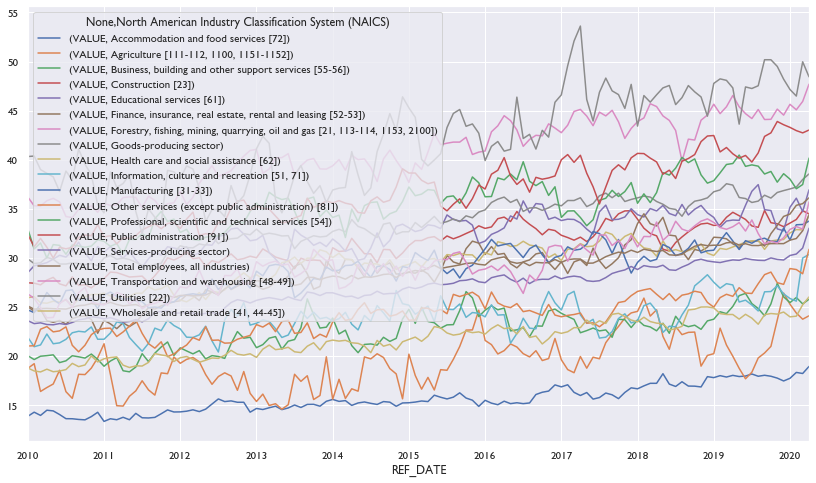

In [68]:
wage_pivot['2010':'2020'].plot(figsize=(14,8))

In [69]:
wage_pivot

\
North American Industry Classification System (NAICS) Educational services [61]   
REF_DATE                                                                          
1997-01-01                                                                18.34   
1997-02-01                                                                18.22   
1997-03-01                                                                18.18   
1997-04-01                                                                18.55   
1997-05-01                                                                18.20   
...                                                                         ...   
2019-12-01                                                                32.76   
2020-01-01                                                                35.15   
2020-02-01                                                                36.08   
2020-03-01                                                                34.71   
2020-04-01                                                                36.93   

                                                                                                                   \
North American Industry Classification System (NAICS) Finance, insurance, real estate, rental and leasing [52-53]   
REF_DATE                                                                                                            
1997-01-01                                                                                         15.43            
1997-02-01                                                                                         15.43            
1997-03-01                                                                                         14.97            
1997-04-01                                                                                         15.61            
1997-05-01                                                                                         16.27            
...                                                                                                  ...            
2019-12-01                                                                                         34.22            
2020-01-01                                                                                         34.46            
2020-02-01                                                                                         35.35            
2020-03-01                                                                                         35.52            
2020-04-01                                                                                         36.12            

                                                                                                                                   \
North American Industry Classification System (NAICS) Forestry, fishing, mining, quarrying, oil and gas [21, 113-114, 1153, 2100]   
REF_DATE                                                                                                                            
1997-01-01                                                                                         20.46                            
1997-02-01                                                                                         20.48                            
1997-03-01                                                                                         20.21                            
1997-04-01                                                                                         20.63                            
1997-05-01                                                                                         19.84                            
...                                                                                                  ...                            
2019-12-01                                                                        

In [74]:
wage_pct = wage_pivot.pct_change()

In [87]:
wage_pct['2020-04']

VALUE  \
North American Industry Classification System (NAICS) Accommodation and food services [72]   
REF_DATE                                                                                     
2020-04-01                                                                        0.039517   

                                                                                              \
North American Industry Classification System (NAICS) Agriculture [111-112, 1100, 1151-1152]   
REF_DATE                                                                                       
2020-04-01                                                                          0.014737   

                                                                                                             \
North American Industry Classification System (NAICS) Business, building and other support services [55-56]   
REF_DATE                                                                                                      
2020-04-01                                                                                       0.01857      

                                                                         \
North American Industry Classification System (NAICS) Construction [23]   
REF_DATE                                                                  
2020-04-01                                                    -0.009195   

                                                                                 \
North American Industry Classification System (NAICS) Educational services [61]   
REF_DATE                                                                          
2020-04-01                                                             0.063959   

                                                                                                                   \
North American Industry Classification System (NAICS) Finance, insurance, real estate, rental and leasing [52-53]   
REF_DATE                                                                                                            
2020-04-01                                                                                      0.016892            

                                                                                                                                   \
North American Industry Classification System (NAICS) Forestry, fishing, mining, quarrying, oil and gas [21, 113-114, 1153, 2100]   
REF_DATE                                                                                                                            
2020-04-01                                                                                      0.038319                            

                                                                              \
North American Industry Classification System (NAICS) Goods-producing sector   
REF_DATE                                                                       
2020-04-01                                                          0.015008   

                                                                                              \
North American Industry Classification System (NAICS) Health care and social assistance [62]   
REF_DATE                                                                                       
2020-04-01                                                                          0.047199   

                                                                                                    \
North American Industry Classification System (NAICS) Information, culture and recreation [51, 71]   
REF_DATE                                                                                             
2020-04-01                                                                                0.012342   

                                                                             \
North American Industry Classification System (N

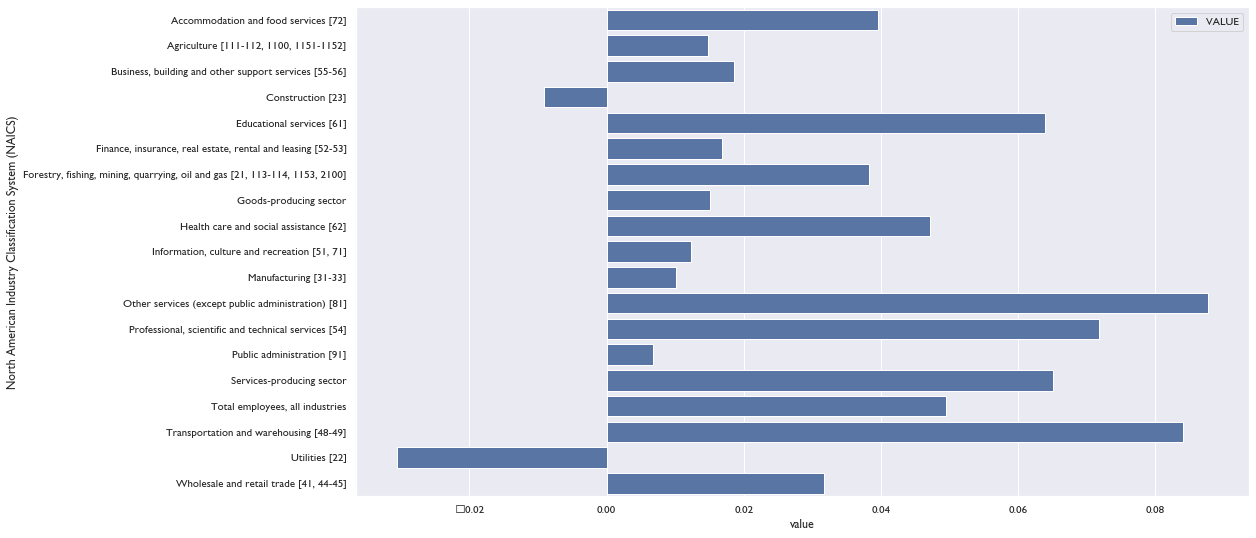

In [94]:

plt.figure(figsize=(16,9))
ax = sns.barplot(y='North American Industry Classification System (NAICS)',x='value', data = pd.melt(wage_pct['2020-04']))
